In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA OVERVIEW

Berikut ini adalah deskripsi dari setiap file yang tersedia pada Dataset :

1. `application_{train|test}.csv`: Berisi setiap aplikasi pinjaman dan variabel target. 

2. `bureau.csv`: Berisi Data kredit dari lembaga kredit untuk setiap pelanggan.

3. `bureau_balance.csv`: Berisi snapshot saldo bulanan dari transaksi kredit sebelumnya dari data lembaga kredit.

4. `previous_application.csv`: Berisi informasi tentang pinjaman sebelumnya di Home Credit dari setiap pelanggan.

5. `POS_CASH_balance.csv`: Berisi snapshot saldo bulanan dari pinjaman POS (titik penjualan) dan tunai sebelumnya dari Home Credit.

6. `credit_card_balance.csv`: Berisi snapshot saldo bulanan dari pinjaman kartu kredit sebelumnya dari Home Credit.

7. `installments_payments.csv`: Berisi riwayat pembayaran untuk pinjaman sebelumnya di Home Credit

# IMPORT DATASET

In [2]:
application_train = pd.read_csv(r'Dataset\application_train.csv')
application_test = pd.read_csv(r'Dataset\application_test.csv')

In [3]:
df_train= application_train[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE',
                    'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE', 'AMT_GOODS_PRICE',
                    'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY', 'TARGET']].copy()
df_train.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,AMT_GOODS_PRICE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,TARGET
0,100002,0.083037,0.262949,0.139376,202500.0,406597.5,Secondary / secondary special,Working,-637,0.018801,Laborers,351000.0,Single / not married,Y,1
1,100003,0.311267,0.622246,NaN,270000.0,1293502.5,Higher education,State servant,-1188,0.003541,Core staff,1129500.0,Married,N,0
2,100004,NaN,0.555912,0.729567,67500.0,135000.0,Secondary / secondary special,Working,-225,0.010032,Laborers,135000.0,Single / not married,Y,0
3,100006,NaN,0.650442,NaN,135000.0,312682.5,Secondary / secondary special,Working,-3039,0.008019,Laborers,297000.0,Civil marriage,Y,0
4,100007,NaN,0.322738,NaN,121500.0,513000.0,Secondary / secondary special,Working,-3038,0.028663,Core staff,513000.0,Single / not married,Y,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   EXT_SOURCE_1                134133 non-null  float64
 2   EXT_SOURCE_2                306851 non-null  float64
 3   EXT_SOURCE_3                246546 non-null  float64
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   NAME_EDUCATION_TYPE         307511 non-null  object 
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   DAYS_EMPLOYED               307511 non-null  int64  
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64
 10  OCCUPATION_TYPE             211120 non-null  object 
 11  AMT_GOODS_PRICE             307233 non-null  float64
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  FLAG_OWN_REALT

# DATA CLEANING AND MANIPULATION

In [5]:
df_train.isna().sum()/len(df_train)*100

SK_ID_CURR                     0.000000
EXT_SOURCE_1                  56.381073
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
DAYS_EMPLOYED                  0.000000
REGION_POPULATION_RELATIVE     0.000000
OCCUPATION_TYPE               31.345545
AMT_GOODS_PRICE                0.090403
NAME_FAMILY_STATUS             0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
dtype: float64

In [6]:
df_train.dropna(inplace=True)

In [7]:
#convert date format into 1 year
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED']*-1/365
df_train['DAYS_EMPLOYED'] = np.floor(df_train['DAYS_EMPLOYED'])
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].astype('int')
df_train.columns = df_train.columns.str.replace('DAYS_EMPLOYED', 'YEARS_EMPLOYED')

In [8]:
df = df_train

In [9]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,SK_ID_CURR,int64,0,0.0,82461,"[100002, 100009, 100014, 100016, 100019, 10002..."
1,EXT_SOURCE_1,float64,0,0.0,74644,"[0.0830369673913225, 0.7747614130547695, 0.319..."
2,EXT_SOURCE_2,float64,0,0.0,57447,"[0.2629485927471776, 0.7239998516953141, 0.651..."
3,EXT_SOURCE_3,float64,0,0.0,769,"[0.1393757800997895, 0.4920600938649263, 0.363..."
4,AMT_INCOME_TOTAL,float64,0,0.0,1002,"[202500.0, 171000.0, 112500.0, 67500.0, 157500..."
5,AMT_CREDIT,float64,0,0.0,4019,"[406597.5, 1560726.0, 652500.0, 80865.0, 29977..."
6,NAME_EDUCATION_TYPE,object,0,0.0,5,"[Secondary / secondary special, Higher educati..."
7,NAME_INCOME_TYPE,object,0,0.0,5,"[Working, Commercial associate, State servant,..."
8,YEARS_EMPLOYED,int32,0,0.0,46,"[1, 8, 7, 3, 4, 9, 2, 12, 19, 11, 6, 13, 0, 24..."
9,REGION_POPULATION_RELATIVE,float64,0,0.0,81,"[0.018801, 0.035792, 0.0228, 0.031329, 0.02071..."


In [10]:
df.TARGET.value_counts(normalize=True)

0    0.924231
1    0.075769
Name: TARGET, dtype: float64

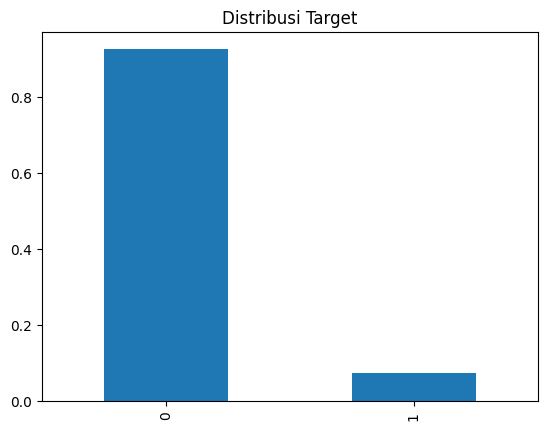

In [21]:
df['TARGET'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribusi Target');

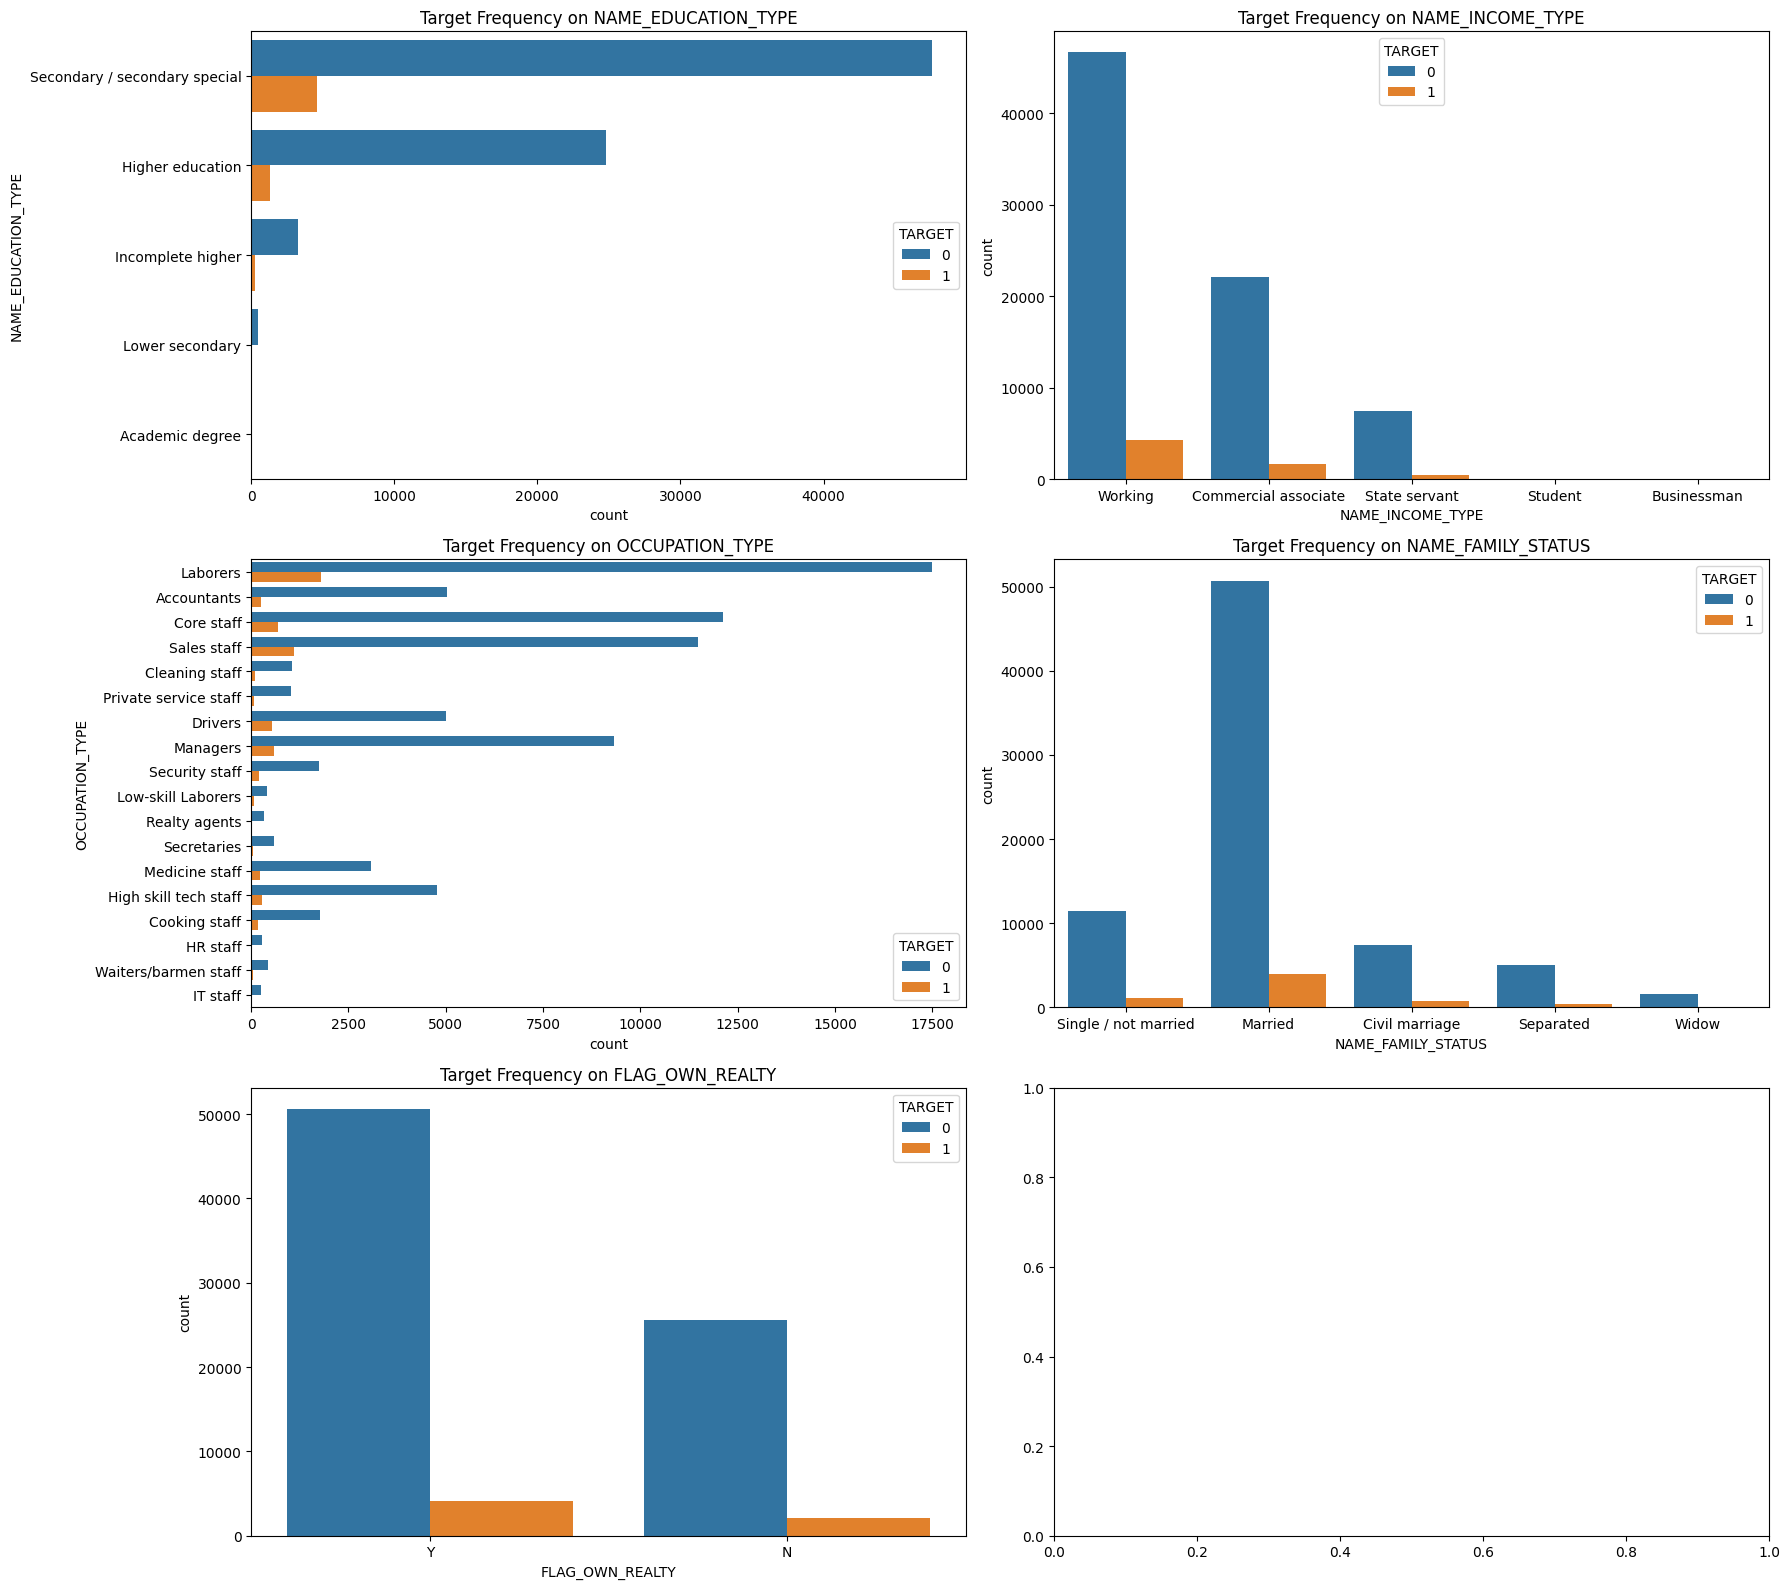

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(18,16))

sns.countplot(data=df, y='NAME_EDUCATION_TYPE', hue='TARGET', ax=axes[0,0]).set_title('Target Frequency on NAME_EDUCATION_TYPE')
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET', ax=axes[0,1]).set_title('Target Frequency on NAME_INCOME_TYPE')
sns.countplot(data=df, y='OCCUPATION_TYPE', hue='TARGET', ax=axes[1,0]).set_title('Target Frequency on OCCUPATION_TYPE')
sns.countplot(data=df, x='NAME_FAMILY_STATUS', hue='TARGET', ax=axes[1,1]).set_title('Target Frequency on NAME_FAMILY_STATUS')
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='TARGET', ax=axes[2,0]).set_title('Target Frequency on FLAG_OWN_REALTY')

plt.tight_layout()

# MODEL

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = df.drop(columns= ['TARGET','SK_ID_CURR', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 
                      'NAME_FAMILY_STATUS', 'FLAG_OWN_REALTY'])
y = df['TARGET']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
# cat_columns = []
num_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'YEARS_EMPLOYED', 
               'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.924664     0.600000  0.924418      0.762332      0.900076
recall         0.999672     0.006005  0.924418      0.502838      0.924418
f1-score       0.960706     0.011891  0.924418      0.486298      0.888849
support    60972.000000  4996.000000  0.924418  65968.000000  65968.000000
_______________________________________________
Confusion Matrix: 
 [[60952    20]
 [ 4966    30]]

Test Result:
Accuracy Score: 92.42%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.924355     0.625000   0.92421      0.774678      0.901631
recall         0.999803     0.003994   0.92421      0.501898      0.924210
f1-score       0.960600     0.007937   0.92421      0.484268      0.888282
support   

In [18]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    60972.0  4996.0       1.0    65968.0       65968.0
_______________________________________________
Confusion Matrix: 
 [[60972     0]
 [    0  4996]]

Test Result:
Accuracy Score: 92.40%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.925426     0.490566  0.924028      0.707996      0.892415
recall         0.998228     0.020767  0.924028      0.509498      0.924028
f1-score       0.960449     0.039847  0.924028      0.500148      0.890566
support    15241.000000  1252.000000  0.924028  16493.000000  16493.000000